# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [16]:
# import numpy and pandas
from statistics import mean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [3]:
# Run this code:
salaries = pd.read_csv('../Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [11]:
# Your code here:
salaries.head(6)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
5,"ABBASI, CHRISTOPHER",STAFF ASST TO THE ALDERMAN,CITY COUNCIL,F,Salary,NaN,50436.0,NaN


In [9]:
len(salaries)

33183

We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [5]:
# Your code here:
# Count total NaN at each column in salaries DataFrame 
print(" \nCount total NaN at each column in salaries DataFrame : \n\n", 
      salaries.isnull().sum()) 

 
Count total NaN at each column in salaries DataFrame : 

 Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64


Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [13]:
# Your code here:
salaries['Salary or Hourly'].value_counts()

Salary    25161
Hourly     8022
Name: Salary or Hourly, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [14]:
# Your code here:
salaries['Department'].value_counts()

POLICE                   13414
FIRE                      4641
STREETS & SAN             2198
OEMC                      2102
WATER MGMNT               1879
AVIATION                  1629
TRANSPORTN                1140
PUBLIC LIBRARY            1015
GENERAL SERVICES           980
FAMILY & SUPPORT           615
FINANCE                    560
HEALTH                     488
CITY COUNCIL               411
LAW                        407
BUILDINGS                  269
COMMUNITY DEVELOPMENT      207
BUSINESS AFFAIRS           171
COPA                       116
BOARD OF ELECTION          107
DoIT                        99
PROCUREMENT                 92
INSPECTOR GEN               87
MAYOR'S OFFICE              85
CITY CLERK                  84
ANIMAL CONTRL               81
HUMAN RESOURCES             79
CULTURAL AFFAIRS            65
BUDGET & MGMT               46
ADMIN HEARNG                39
DISABILITIES                28
TREASURER                   22
HUMAN RELATIONS             16
BOARD OF

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

 We will test whether the hourly wage of all hourly workers is significantly different from $30/hr
 
 La hipótesis nula siempre dice que el parámetro poblacional es igual al valor propuesto.
 
 La hipótesis nula siempre lleva el signo de igual; H0 no puede contener el signo ≤ ni el signo ≥.
 
 La hipótesis nula dice que no ocurre nada nuevo; el resultado previo no varía o los grupos tienen la misma media (la diferencia es igual a cero). En general, se supone que una afirmación es verdadera hasta que se demuestre lo contrario. Así pues, la pregunta debe ser: ¿puedes demostrar lo contrario? Dicho de otro modo, ¿tienes pruebas suficientes para rechazar H0?
 
 Para este ejemplo, lo que "inferimos" del parámetro poblacional es que es $30/ hora (será nuestra H0)
 ¿Tenemos las suficientes pruebas para rechazar Ho?
 
 H0: μ=30
 
 Ha: μ ≠ 30

<AxesSubplot:ylabel='Frequency'>

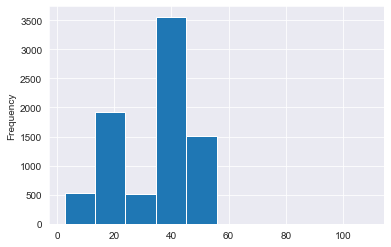

In [23]:
#para que se vean los ejes x & y 
sns.set_style('darkgrid')

#vamos a graficar los datos de la columna Hourly Rate para ver que se distribuyen de manera normal
salaries['Hourly Rate'].plot.hist()
#los datos de la columna Hourly Rate no se ve que estén distribuidos de manera normal, por lo que usamos
#la distribución t

In [21]:
#Asginar los valores a una variable que se llame igual que la columna sin los NaN
hourly_rate = salaries['Hourly Rate'].dropna()
hourly_rate

4        19.86
6        46.10
7        35.60
10        2.65
18       17.68
         ...  
33164    46.10
33168    17.68
33169    35.60
33174    46.35
33175    48.85
Name: Hourly Rate, Length: 8022, dtype: float64

In [22]:
#calculo de media poblacional de la columna Hourly Rate
hr_mu = hourly_rate.mean()
print(f'La media poblacional de la columna Hourly Rate es: {hr_mu}')

#Calculamos nuestra desviación estandar poblacional de la columna Hourly Rate
hr_sigma = hourly_rate.std()
print(f'La desviación estandar poblacional de la columna Hourly Rate es: {hr_sigma}')

La media poblacional de la columna Hourly Rate es: 32.78855771628024
La desviación estandar poblacional de la columna Hourly Rate es: 12.112572684276799


In [24]:
#es bueno hacer diferentes muestras
#Tomar 100 muestras aleatorias de toda la población de datos de la columna Hourly Rate
#Calcular la media de estas muestras aleatorias
#Regresar el valor para hacer diferentes tipos de prueba de hipotesis

#permite de manera aleatoria, seleccionar datos de mi población
def generate_means(data):
  means =[]
  for i in range(1000):
    #Obteniendo muestras de mi población de 100 en 100
    samples = np.random.choice(data,100,replace=True)
    #Calcular la media de mis muestras
    means.append(samples.mean())
  return means

In [26]:
hr_means = generate_means(hourly_rate)
#hr_means

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

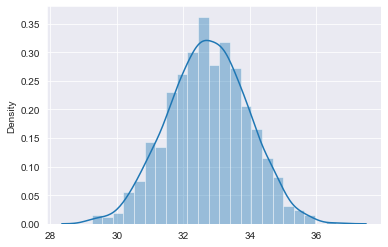

In [33]:
#kde = hace referencia a la columna y, muestra los valores como una densidad
sns.distplot(hr_means, hist=True,kde=True)
#plt.show()

scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided')

a = Sample observation

popmean (float or array_like) = Expected value in null hypothesis

In [35]:
#Vamos a usar stats para hacer nuestra prueba t
t, p = stats.ttest_1samp(hourly_rate,30)

#Nos regresa el valor de t al inicio
#Recordemos que un valor de t pequeño nos dice que nuestros grupos son similares
#Caso contrario, un valor de t grande nos dice que no son similares
#Cuando es muy pequeño, significa que hay diferencia significativa (menor)
#Cuando es mayor, hay diferencia significativa (mayor)

#Los valores p nos interesan que sean bajos,
#Significa que un valor de p indica una fuerte evidencia en contra de H_0
#Caso contrario, no tendríamos evidencia de si es nula nuestra H_0
print(t,p)



#dado que mi valor de p fue MUY BAJO, fue menor a (0.05), significa que la Ho es falsa (la podemos rechazar)
#Es poco probable que Ho, en este caso, que el salario de los que trabajen por hora sea $30, sea cierto

20.6198057854942 4.3230240486229894e-92


Una p < 0,05 significa que la hipótesis nula es falsa y una p > 0,05 que la hipótesis nula es verdadera: siempre nos movemos en el terreno de la probabilidad. Una p < 0,05 quiere simplemente decir que es poco probable que la H0 sea cierta

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.
Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

Para este ejemplo, lo que "inferimos" del parámetro poblacional es que es $86,000 (será nuestra H0)
 ¿Tenemos las suficientes pruebas para rechazar Ho?
 
 H0: μ = 86,000
 
 Ha: μ > 86,000

In [62]:
#vamos a ver si la media de todos los salarios de todos los departamentos es 86,000 (validado)
tot_salaries = salaries['Annual Salary'].dropna()
tot_salaries_mu = tot_salaries.mean()
tot_salaries_mu

86786.99979015143

<AxesSubplot:ylabel='Frequency'>

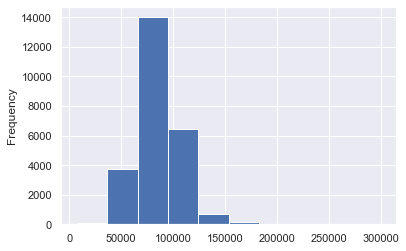

In [39]:
#hacemos la grafica para comprobar que los datos se comportan de manera normal
tot_salaries.plot.hist()

In [40]:
#es bueno hacer diferentes muestras
#Tomar 100 muestras aleatorias de toda la población de vinos
#Calcular la media de estas muestras aleatorias
#Regresar el valor para hacer diferentes tipos de prueba de hipotesis

#permite de manera aleatoria, seleccionar datos de mi población
def generate_means(data):
  means =[]
  for i in range(1000):
    #Obteniendo muestras de mi población de 100 en 100
    samples = np.random.choice(data,100,replace=True)
    #Calcular la media de mis muestras
    means.append(samples.mean())
  return means

In [42]:
medias_departamentos = generate_means(tot_salaries)
#medias_departamentos

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

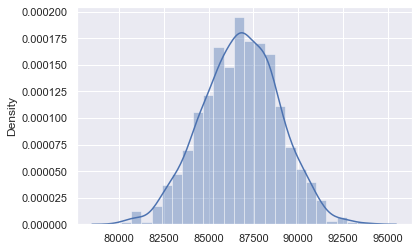

In [43]:
sns.distplot(medias_departamentos, hist=True,kde=True)

In [54]:
#obtenemos la media de todos los salarios del departamento de policia
pol_salaries = salaries['Annual Salary'][(salaries.Department=='POLICE')].dropna()
pol_salaries
pol_salaries_mu = pol_salaries.mean()
pol_salaries_mu

86486.41450313339

In [60]:
#Vamos a usar stats para hacer nuestra prueba t 
t, p = stats.ttest_1samp(pol_salaries,86000)
print(t,(p/2))

3.081997005712994 0.0010301701775482569


In [61]:
if p/2 < 0.05:
    print("Se rechaza H0")
else:
    print("No se rechaza H0")
    
#dado que mi valor de p fue BAJO, fue menor a (0.05), significa que la Ho es falsa (la podemos rechazar)
#Es poco probable que Ho (salario promedio de los policias sea 86000) sea cierto
#ya que la media esta en 86,486

Se rechaza H0


Using the `crosstab` function, find the department that has the most hourly workers. 

In [58]:
# Your code here:
crosstab = pd.crosstab(salaries['Department'], salaries['Salary or Hourly']).sort_values('Hourly',ascending=False)
crosstab

Salary or Hourly,Hourly,Salary
Department,,
STREETS & SAN,1862,336
WATER MGMNT,1513,366
OEMC,1273,829
AVIATION,1082,547
GENERAL SERVICES,765,215
TRANSPORTN,725,415
PUBLIC LIBRARY,299,716
FAMILY & SUPPORT,287,328
CITY COUNCIL,64,347


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

Para este ejemplo, lo que "inferimos" del parámetro poblacional es que es $35 (será nuestra H0)
 ¿Tenemos las suficientes pruebas para rechazar Ho?
 
 H0: μ >= 35
 
 Ha: μ < 35

scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided')

a = Sample observation

popmean (float or array_like) = Expected value in null hypothesis

In [67]:
#obtenemos los datos del sueldo por hora, del departamento de STREETS & SAN que trabajan por hora (hourly)
ss_salaries = salaries[(salaries['Department'] == 'STREETS & SAN') & (salaries['Salary or Hourly'] == 'Hourly')]['Hourly Rate']
ss_salaries

7        35.60
21       21.43
24       35.60
36       36.21
39       35.60
         ...  
33106    36.13
33107    35.60
33147    35.60
33149    36.21
33156    22.12
Name: Hourly Rate, Length: 1862, dtype: float64

In [71]:
ss_salaries.mean()

33.72837808807734

In [69]:
#Vamos a usar stats para hacer nuestra prueba t 
t, p = stats.ttest_1samp(ss_salaries,35)
print(t,p)

-9.567447887848152 3.3378530564707717e-21


In [70]:
if p/2 < 0.05:
    print("Se rechaza H0")
else:
    print("No se rechaza H0")
    
#dado que mi valor de p fue BAJO, fue menor a (0.05), significa que la Ho es falsa (la podemos rechazar)
#Es poco probable que Ho (salario promedio por hora de los trabajadores del dep Streets & San >= 35) sea cierto
#ya que la media esta en 33.72

Se rechaza H0


# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

#interval method: interval(alpha, df, loc=0, scale=1)
#stats.t.interval(alpha = confidence_level, df = degrees_freedom, loc = sample_mean, scale = sample_standard_error)

In [72]:
confidence_level = 0.95

In [77]:
degrees_freedom = len(hourly_rate)-1
degrees_freedom

8021

In [78]:
sample_mean = hourly_rate.mean()
sample_mean

32.78855771628024

In [79]:
sample_standard_error = stats.sem(hourly_rate)
sample_standard_error

0.1352368565101596

In [80]:
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

#intervalo de confianza para todos los que cobran por hora
confidence_interval

(32.52345834488425, 33.05365708767623)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [82]:
# Your code here:
#intervalo de confianza para todos los empleados con sueldo en el departamento de policias
#confidence_level es el mismo = 0.95
pol_degrees_freedom = len(pol_salaries)-1
pol_degrees_freedom

13403

In [83]:
pol_salaries_mu
pol_sample_standard_error = stats.sem(pol_salaries)
pol_sample_standard_error

157.82445675052244

In [84]:
pol_confidence_interval = stats.t.interval(confidence_level, pol_degrees_freedom, pol_salaries_mu, pol_sample_standard_error)

#ntervalo de confianza para todos los empleados con sueldo en el departamento de policias
pol_confidence_interval

(86177.05631531784, 86795.77269094894)

# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [85]:
# Your code here:
from statsmodels.stats.proportion import proportions_ztest

In [90]:
#null_hypothesis_hourly = 25%
significance = 0.025

stat, p_value = proportions_ztest(nobs=len(salaries['Salary or Hourly']),count=len(hourly_rate),value=0.25,alternative='two-sided')

if p_value > significance:
     print ("No rechazamos la H0 ")
else:
    print ("Rechazamos la H0")

Rechazamos la H0
